In [9]:

%matplotlib inline
import utils; reload(utils)
from utils import *
from __future__ import division, print_function

In [100]:
from sklearn.decomposition import PCA

In [6]:
import os
os.getcwd()
path = "data/ml-latest-small/"
model_path = path+"model/"
if not os.path.exists(model_path): os.mkdir(model_path)
batch_size = 64

### setup data

In [10]:
movie_ratings = pd.read_csv(path+"ratings.csv")

In [11]:
movie_ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [12]:
len(movie_ratings)

100004

In [18]:
movie_names = pd.read_csv(path+"movies.csv").set_index('movieId')['title'].to_dict()

In [23]:
users = movie_ratings.userId.unique()
movies = movie_ratings.movieId.unique()

In [24]:
movie2idx = {o:i for i,o in enumerate(movies)}
useri2idx = {o:i for i,o in enumerate(users)}

In [30]:
movie_ratings.userId = movie_ratings.userId.apply(lambda x : useri2idx[x])
movie_ratings.movieId = movie_ratings.movieId.apply(lambda x : movie2idx[x])

In [31]:
user_min,user_max,movie_min,movie_max= (movie_ratings.userId.min(),movie_ratings.userId.max(),
                                        movie_ratings.movieId.min(),movie_ratings.movieId.max())
user_min,user_max

(0, 670)

In [36]:
n_users = movie_ratings.userId.nunique()
n_movies = movie_ratings.movieId.nunique()
n_users,n_movies

(671, 9066)

In [37]:
n_factors = 50
np.random.seed = 42

msk = np.random.rand(len(movie_ratings)) < 0.8
trn = movie_ratings[msk] 
val = movie_ratings[~msk]

### creating the excel data using crosstab

In [41]:
g = movie_ratings.groupby('userId')['movieId'].count()
topUsers = g.sort_values(ascending=False)[:15]
topUsers

userId
546    2391
563    1868
623    1735
14     1700
72     1610
451    1340
467    1291
379    1063
310    1019
29     1011
293     947
508     923
579     922
212     910
211     876
Name: movieId, dtype: int64

In [81]:
movie_ratings.groupby('userId')['movieId'].count()

userId
0        20
1        76
2        51
3       204
4       100
5        44
6        88
7       116
8        45
9        46
10       38
11       61
12       53
13       20
14     1700
15       29
16      363
17       51
18      423
19       98
20      162
21      220
22      726
23       21
24       26
25      172
26       23
27       50
28       22
29     1011
       ... 
641      36
642      24
643      39
644      30
645     169
646     150
647     256
648      90
649      29
650      20
651     267
652      51
653     626
654     105
655     128
656      20
657      60
658     142
659      92
660      33
661      58
662      26
663     519
664     434
665      40
666      68
667      20
668      37
669      31
670     115
Name: movieId, Length: 671, dtype: int64

In [42]:
g = movie_ratings.groupby('movieId')['rating'].count()
topMovies = g.sort_values(ascending=False)[:15]
topMovies

movieId
57     341
49     324
99     311
92     304
143    291
72     274
402    259
417    247
79     244
89     237
179    234
27     228
197    226
505    224
180    220
Name: rating, dtype: int64

In [45]:
top_r = movie_ratings.join(topUsers,on='userId',how='inner',rsuffix='_r')
top_r = top_r.join(topMovies,on='movieId',how='inner',rsuffix='_r')
pd.crosstab(top_r.userId,top_r.movieId,top_r.rating,aggfunc=np.sum)

movieId,27,49,57,72,79,89,92,99,143,179,180,197,402,417,505
userId,,,,,,,,,,,,,,,
14,3.0,5.0,1.0,3.0,4.0,4.0,5.0,2.0,5.0,5.0,4.0,5.0,5.0,2.0,5.0
29,5.0,5.0,5.0,4.0,5.0,4.0,4.0,5.0,4.0,4.0,5.0,5.0,3.0,4.0,5.0
72,4.0,5.0,5.0,4.0,5.0,3.0,4.5,5.0,4.5,5.0,5.0,5.0,4.5,5.0,4.0
211,5.0,4.0,4.0,3.0,5.0,3.0,4.0,4.5,4.0,NaN,3.0,3.0,5.0,3.0,NaN
212,2.5,NaN,2.0,5.0,NaN,4.0,2.5,NaN,5.0,5.0,3.0,3.0,4.0,3.0,2.0
293,3.0,NaN,4.0,4.0,4.0,3.0,NaN,3.0,4.0,4.0,4.5,4.0,4.5,4.0,NaN
310,3.0,3.0,5.0,4.5,5.0,4.5,2.0,4.5,4.0,3.0,4.5,4.5,4.0,3.0,4.0
379,5.0,5.0,5.0,4.0,NaN,4.0,5.0,4.0,4.0,4.0,NaN,3.0,5.0,4.0,4.0
451,4.0,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,4.0,4.0,2.0,3.5,5.0


### Dot Product

In [51]:
userin = Input(shape=(1,),dtype='int64',name='userin')
moviein = Input(shape=(1,),dtype='int64',name='moviein')
u = Embedding(n_users,n_factors,input_length=1,W_regularizer=l2(1e-4))(userin)
m = Embedding(n_movies,n_factors,input_length=1,W_regularizer=l2(1e-4))(moviein)
x = merge([u,m],mode='dot')
x = Flatten()(x)
model = Model([userin,moviein],x)
model.compile(Adam(0.001),loss='mse')

In [53]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
userin (InputLayer)              (None, 1)             0                                            
____________________________________________________________________________________________________
moviein (InputLayer)             (None, 1)             0                                            
____________________________________________________________________________________________________
embedding_3 (Embedding)          (None, 1, 50)         33550       userin[0][0]                     
____________________________________________________________________________________________________
embedding_4 (Embedding)          (None, 1, 50)         453300      moviein[0][0]                    
___________________________________________________________________________________________

In [55]:
model.fit([trn.userId,trn.movieId],trn.rating,batch_size=64,nb_epoch=10,validation_data=([val.userId,val.movieId],val.rating))

Train on 79900 samples, validate on 20104 samples
Epoch 1/10
79900/79900 [==============================] - 8s - loss: 2.4209 - val_loss: 2.6222
Epoch 2/10
79900/79900 [==============================] - 8s - loss: 2.2585 - val_loss: 2.5727
Epoch 3/10
79900/79900 [==============================] - 8s - loss: 2.1998 - val_loss: 2.5626
Epoch 4/10
79900/79900 [==============================] - 8s - loss: 2.1687 - val_loss: 2.5624
Epoch 5/10
79900/79900 [==============================] - 8s - loss: 2.1433 - val_loss: 2.5670
Epoch 6/10
79900/79900 [==============================] - 9s - loss: 2.1186 - val_loss: 2.5589
Epoch 7/10
79900/79900 [==============================] - 9s - loss: 2.0934 - val_loss: 2.5593
Epoch 8/10
79900/79900 [==============================] - 9s - loss: 2.0687 - val_loss: 2.5694
Epoch 9/10
79900/79900 [==============================] - 9s - loss: 2.0468 - val_loss: 2.5703
Epoch 10/10
79900/79900 [==============================] - 9s - loss: 2.0246 - val_loss: 2.5862

In [57]:
model.optimizer.lr=0.01
model.fit([trn.userId,trn.movieId],trn.rating,batch_size=64,nb_epoch=10,validation_data=([val.userId,val.movieId],val.rating))

Train on 79900 samples, validate on 20104 samples
Epoch 1/10
79900/79900 [==============================] - 8s - loss: 2.0063 - val_loss: 2.5941
Epoch 2/10
79900/79900 [==============================] - 8s - loss: 1.9876 - val_loss: 2.6061
Epoch 3/10
79900/79900 [==============================] - 8s - loss: 1.9714 - val_loss: 2.6145
Epoch 4/10
79900/79900 [==============================] - 9s - loss: 1.9546 - val_loss: 2.6286
Epoch 5/10
79900/79900 [==============================] - 9s - loss: 1.9415 - val_loss: 2.6378
Epoch 6/10
79900/79900 [==============================] - 9s - loss: 1.9282 - val_loss: 2.6511
Epoch 7/10
79900/79900 [==============================] - 9s - loss: 1.9166 - val_loss: 2.6631
Epoch 8/10
79900/79900 [==============================] - 9s - loss: 1.9040 - val_loss: 2.6790
Epoch 9/10
79900/79900 [==============================] - 10s - loss: 1.8946 - val_loss: 2.6969
Epoch 10/10
79900/79900 [==============================] - 9s - loss: 1.8859 - val_loss: 2.702

### create Bias

In [64]:
def embedding_input(name,n_in,n_out,reg):
    x = Input(shape=(1,),dtype='int64',name=name)
    return x, Embedding(n_in,n_out,input_length=1,W_regularizer=l2(reg))(x)

user_in, u = embedding_input("user_in",n_users,n_factors,1e-4)
movie_in, m = embedding_input("movie_in",n_movies,n_factors,1e-4)

def create_bias(inp,n_in):
    x = Embedding(n_in,1,input_length=1)(inp)
    return Flatten()(x)
ub = create_bias(user_in,n_users)
mb = create_bias(movie_in,n_movies)

x = merge([u,m],mode='dot')
x = Flatten()(x) 
x = merge([x,ub],mode='sum')
x = merge([x,mb],mode='sum')
model = Model([user_in,movie_in],x)
model.compile(Adam(0.001),loss='mse')

In [65]:
model.fit([trn.userId,trn.movieId],trn.rating,batch_size=128,nb_epoch=5,validation_data=([val.userId,val.movieId],val.rating))


Train on 79900 samples, validate on 20104 samples
Epoch 1/5
79900/79900 [==============================] - 4s - loss: 10.8837 - val_loss: 5.4259
Epoch 2/5
79900/79900 [==============================] - 5s - loss: 3.3879 - val_loss: 2.6367
Epoch 3/5
79900/79900 [==============================] - 7s - loss: 2.2252 - val_loss: 2.2838
Epoch 4/5
79900/79900 [==============================] - 6s - loss: 1.9741 - val_loss: 2.1661
Epoch 5/5
79900/79900 [==============================] - 7s - loss: 1.8668 - val_loss: 2.1007


In [66]:
model.optimizer.lr = 0.001
model.fit([trn.userId,trn.movieId],trn.rating,batch_size=128,nb_epoch=10,validation_data=([val.userId,val.movieId],val.rating))

Train on 79900 samples, validate on 20104 samples
Epoch 1/10
79900/79900 [==============================] - 7s - loss: 1.7981 - val_loss: 2.0505
Epoch 2/10
79900/79900 [==============================] - 7s - loss: 1.7401 - val_loss: 2.0015
Epoch 3/10
79900/79900 [==============================] - 7s - loss: 1.6840 - val_loss: 1.9563
Epoch 4/10
79900/79900 [==============================] - 7s - loss: 1.6311 - val_loss: 1.9108
Epoch 5/10
79900/79900 [==============================] - 8s - loss: 1.5781 - val_loss: 1.8665
Epoch 6/10
79900/79900 [==============================] - 7s - loss: 1.5275 - val_loss: 1.8231
Epoch 7/10
79900/79900 [==============================] - 7s - loss: 1.4760 - val_loss: 1.7814
Epoch 8/10
79900/79900 [==============================] - 7s - loss: 1.4274 - val_loss: 1.7388
Epoch 9/10
79900/79900 [==============================] - 7s - loss: 1.3780 - val_loss: 1.6982
Epoch 10/10
79900/79900 [==============================] - 7s - loss: 1.3309 - val_loss: 1.6635

In [67]:
model.optimizer.lr = 0.01
model.fit([trn.userId,trn.movieId],trn.rating,batch_size=128,nb_epoch=10,validation_data=([val.userId,val.movieId],val.rating))

Train on 79900 samples, validate on 20104 samples
Epoch 1/10
79900/79900 [==============================] - 7s - loss: 1.2848 - val_loss: 1.6213
Epoch 2/10
79900/79900 [==============================] - 7s - loss: 1.2401 - val_loss: 1.5840
Epoch 3/10
79900/79900 [==============================] - 7s - loss: 1.1967 - val_loss: 1.5496
Epoch 4/10
79900/79900 [==============================] - 7s - loss: 1.1551 - val_loss: 1.5158
Epoch 5/10
79900/79900 [==============================] - 7s - loss: 1.1147 - val_loss: 1.4849
Epoch 6/10
79900/79900 [==============================] - 7s - loss: 1.0750 - val_loss: 1.4532
Epoch 7/10
79900/79900 [==============================] - 7s - loss: 1.0376 - val_loss: 1.4240
Epoch 8/10
79900/79900 [==============================] - 7s - loss: 1.0012 - val_loss: 1.3949
Epoch 9/10
79900/79900 [==============================] - 7s - loss: 0.9662 - val_loss: 1.3696
Epoch 10/10
79900/79900 [==============================] - 7s - loss: 0.9327 - val_loss: 1.3433

In [68]:
model.optimizer.lr = 0.001
model.fit([trn.userId,trn.movieId],trn.rating,batch_size=128,nb_epoch=10,validation_data=([val.userId,val.movieId],val.rating))

Train on 79900 samples, validate on 20104 samples
Epoch 1/10
79900/79900 [==============================] - 7s - loss: 0.9005 - val_loss: 1.3176
Epoch 2/10
79900/79900 [==============================] - 7s - loss: 0.8701 - val_loss: 1.2927
Epoch 3/10
79900/79900 [==============================] - 8s - loss: 0.8410 - val_loss: 1.2709
Epoch 4/10
79900/79900 [==============================] - 7s - loss: 0.8135 - val_loss: 1.2494
Epoch 5/10
79900/79900 [==============================] - 7s - loss: 0.7872 - val_loss: 1.2290
Epoch 6/10
79900/79900 [==============================] - 7s - loss: 0.7624 - val_loss: 1.2106
Epoch 7/10
79900/79900 [==============================] - 4s - loss: 0.7391 - val_loss: 1.1922
Epoch 8/10
79900/79900 [==============================] - 4s - loss: 0.7174 - val_loss: 1.1749
Epoch 9/10
79900/79900 [==============================] - 4s - loss: 0.6969 - val_loss: 1.1597
Epoch 10/10
79900/79900 [==============================] - 7s - loss: 0.6779 - val_loss: 1.1456

In [70]:
model.save_weights(model_path+'bias.h5')
model.load_weights(model_path+'bias.h5')

In [73]:
model.predict([np.array([3]),np.array([6])])

array([[ 4.9786]], dtype=float32)

In [74]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
user_in (InputLayer)             (None, 1)             0                                            
____________________________________________________________________________________________________
movie_in (InputLayer)            (None, 1)             0                                            
____________________________________________________________________________________________________
embedding_13 (Embedding)         (None, 1, 50)         33550       user_in[0][0]                    
____________________________________________________________________________________________________
embedding_14 (Embedding)         (None, 1, 50)         453300      movie_in[0][0]                   
___________________________________________________________________________________________

### Analasys

In [87]:
g  = movie_ratings.groupby('movieId')['rating'].count()
topMovies = g.sort_values(ascending=False)[:2000]
topMovies = np.array(topMovies.index)
topMovies

array([  57,   49,   99, ..., 3436, 1804, 1793])

In [95]:
get_movie_bias = Model(movie_in,mb)
movies_bias = get_movie_bias.predict(topMovies)
movie_ratings = [(b[0],movie_names[movies[i]]) for i,b in zip(topMovies,movies_bias)]


In [96]:
sorted(movie_ratings,key=itemgetter(0))[:15]

[(-0.59436661, 'Battlefield Earth (2000)'),
 (-0.19754048, 'Little Nicky (2000)'),
 (-0.14774847, 'Speed 2: Cruise Control (1997)'),
 (-0.1202035, 'Super Mario Bros. (1993)'),
 (-0.10766349, 'Bio-Dome (1996)'),
 (-0.036007706, '2 Fast 2 Furious (Fast and the Furious 2, The) (2003)'),
 (-0.025972215, 'Superman IV: The Quest for Peace (1987)'),
 (-0.01023565, 'Police Academy 5: Assignment: Miami Beach (1988)'),
 (0.0094238073, 'Police Academy 6: City Under Siege (1989)'),
 (0.041419443, 'Jaws 3-D (1983)'),
 (0.048897721, 'Howard the Duck (1986)'),
 (0.054537874, 'Spice World (1997)'),
 (0.069081135, 'Wild Wild West (1999)'),
 (0.076677635, 'Blade: Trinity (2004)'),
 (0.089482628, 'Road to Wellville, The (1994)')]

In [97]:
sorted(movie_ratings,key=itemgetter(0),reverse=True)[:15]

[(1.6315542, "Howl's Moving Castle (Hauru no ugoku shiro) (2004)"),
 (1.5398322, 'You Can Count on Me (2000)'),
 (1.534071, 'Rush (2013)'),
 (1.5096015, 'Little Big Man (1970)'),
 (1.4929283, 'My Neighbor Totoro (Tonari no Totoro) (1988)'),
 (1.4573827, 'Gold Rush, The (1925)'),
 (1.4364604, 'Shawshank Redemption, The (1994)'),
 (1.4363734, 'The Imitation Game (2014)'),
 (1.4304433, 'Tom Jones (1963)'),
 (1.4131697, 'Argo (2012)'),
 (1.4009535, 'Harry Potter and the Deathly Hallows: Part 2 (2011)'),
 (1.3987947,
  "Monty Python's And Now for Something Completely Different (1971)"),
 (1.3960022, 'Ideal Husband, An (1999)'),
 (1.3769603, 'Three Colors: Blue (Trois couleurs: Bleu) (1993)'),
 (1.3762519,
  'Fog of War: Eleven Lessons from the Life of Robert S. McNamara, The (2003)')]

In [98]:
get_movie_emb = Model(movie_in,m)
movie_emb = np.squeeze(get_movie_emb.predict([topMovies]))
movie_emb.shape

(2000, 50)

In [102]:
pca = PCA(n_components=3)
movie_pca = pca.fit(movie_emb.T).components_
movie_pca.shape

(3, 2000)

In [104]:
fca = movie_pca[0]

In [105]:
movie_comp = [(i,movie_names[movies[j]])for i,j in zip(fca,topMovies)]

In [108]:
sorted(movie_comp,reverse=False,key=itemgetter(0))[:10]

[(-0.055180183341796404, 'Usual Suspects, The (1995)'),
 (-0.054853027809343244,
  'Star Wars: Episode V - The Empire Strikes Back (1980)'),
 (-0.05392377051343572,
  "Amelie (Fabuleux destin d'Am\xc3\xa9lie Poulain, Le) (2001)"),
 (-0.053490809847349087, 'Silence of the Lambs, The (1991)'),
 (-0.053199677571584746, 'Wallace & Gromit: The Wrong Trousers (1993)'),
 (-0.053071164528338648,
  'Lord of the Rings: The Return of the King, The (2003)'),
 (-0.052570260790190587, 'Toy Story (1995)'),
 (-0.052287270038092248, 'Run Lola Run (Lola rennt) (1998)'),
 (-0.052239763866224531, 'American Beauty (1999)'),
 (-0.051578654632464839, 'Shawshank Redemption, The (1994)')]

In [109]:
sorted(movie_comp,reverse=True,key=itemgetter(0))[:10]

[(0.019800805618678585, 'Anaconda (1997)'),
 (0.013045828626596492, 'Police Academy 3: Back in Training (1986)'),
 (0.011806221362314621, 'Howard the Duck (1986)'),
 (0.011684074216186002, 'Barb Wire (1996)'),
 (0.011663255404825023,
  'Highlander III: The Sorcerer (a.k.a. Highlander: The Final Dimension) (1994)'),
 (0.011546864571061771, 'Police Academy 6: City Under Siege (1989)'),
 (0.011499848935653071, 'Gremlins 2: The New Batch (1990)'),
 (0.011142500153998218, 'House on Haunted Hill (1999)'),
 (0.010699723392539367, 'Police Academy 5: Assignment: Miami Beach (1988)'),
 (0.010312003912757215, 'Mighty Morphin Power Rangers: The Movie (1995)')]

In [111]:
fca1 = movie_pca[1]
movie_comp = [(i,movie_names[movies[j]]) for i,j in zip(fca1,topMovies)]

In [113]:
sorted(movie_comp,reverse=False,key=itemgetter(0))[:10]

[(-0.11133227094398046, 'Independence Day (a.k.a. ID4) (1996)'),
 (-0.10432427680892606, 'Armageddon (1998)'),
 (-0.084126030986164627, 'Titanic (1997)'),
 (-0.079704428222592716, 'Stargate (1994)'),
 (-0.070931565302142049, 'Speed (1994)'),
 (-0.070380424974611902, 'Jurassic Park (1993)'),
 (-0.069416314252433706, 'Rock, The (1996)'),
 (-0.068314629152012488, 'American President, The (1995)'),
 (-0.068219401562880366, 'Twister (1996)'),
 (-0.067103333303696167, 'Waterworld (1995)')]

In [114]:
sorted(movie_comp,reverse=True,key=itemgetter(0))[:10]

[(0.067212082519973293, 'Clockwork Orange, A (1971)'),
 (0.064043043216107057, 'Annie Hall (1977)'),
 (0.062959150222062193, 'City Lights (1931)'),
 (0.062719061764760733, 'Apocalypse Now (1979)'),
 (0.061685154821593528, 'Harold and Maude (1971)'),
 (0.059759509522027431, 'Royal Tenenbaums, The (2001)'),
 (0.058248003127838087, 'Bringing Up Baby (1938)'),
 (0.057927902804054542, 'Lost in Translation (2003)'),
 (0.056718109298887938, 'Manhattan (1979)'),
 (0.056102310693174687, 'Requiem for a Dream (2000)')]

In [115]:
fca2 = movie_pca[2]
movie_comp = [(i,movie_names[movies[j]]) for i,j in zip(fca2,topMovies)]

In [116]:
sorted(movie_comp,reverse=False,key=itemgetter(0))[:10]

[(-0.10781106011200639, 'Dumb & Dumber (Dumb and Dumber) (1994)'),
 (-0.10366165506398141, 'Silence of the Lambs, The (1991)'),
 (-0.094545467109257736, 'Seven (a.k.a. Se7en) (1995)'),
 (-0.091815264712175118, 'Eyes Wide Shut (1999)'),
 (-0.084780418617034628, 'Terminator 2: Judgment Day (1991)'),
 (-0.084551048995243072, 'Ace Ventura: Pet Detective (1994)'),
 (-0.082837911330745015, 'Stargate (1994)'),
 (-0.080627546086719765, '2001: A Space Odyssey (1968)'),
 (-0.079082468067482176, 'Scream (1996)'),
 (-0.074256450911879851, 'American Pie (1999)')]

In [117]:
sorted(movie_comp,reverse=True,key=itemgetter(0))[:10]

[(0.080637565268260158, 'Chicken Run (2000)'),
 (0.070638689432691151,
  'Chronicles of Narnia: The Lion, the Witch and the Wardrobe, The (2005)'),
 (0.066070888878957609, 'Sabrina (1995)'),
 (0.065400913435887373, 'Blind Side, The  (2009)'),
 (0.061880288932679654, 'Life Is Beautiful (La Vita \xc3\xa8 bella) (1997)'),
 (0.061565779834228312, 'Lilo & Stitch (2002)'),
 (0.060418583141510732, 'Bend It Like Beckham (2002)'),
 (0.059246488529499958, 'Chicago (2002)'),
 (0.058502792877394606, "Pirates of the Caribbean: Dead Man's Chest (2006)"),
 (0.058082687460052788, 'Superman II (1980)')]

In [121]:
import sys
stdout, stderr = sys.stdout, sys.stderr # save notebook stdout and stderr
reload(sys)
sys.setdefaultencoding('utf-8')
sys.stdout, sys.stderr = stdout, stderr # restore notebook stdout and stderr

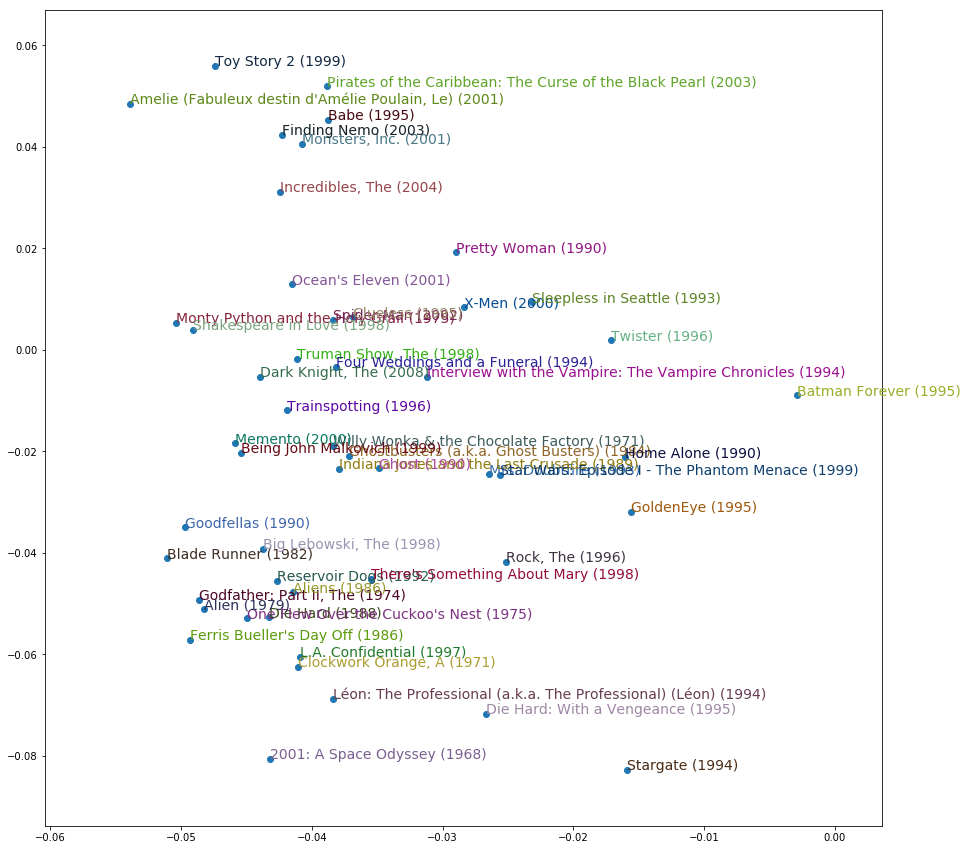

In [122]:
start = 50;end=100
X = fca[start:end]
Y = fca2[start:end]
plt.figure(figsize=(15,15))
plt.scatter(X,Y)
for i,j,k in zip(topMovies[start:end],X,Y):
    plt.text(j,k,movie_names[movies[i]],color=np.random.rand(3)*0.7,fontsize=14)
plt.show()

### Neural Nets

In [123]:
user_in,u = embedding_input("user_in",n_users,n_factors,1e-4)
movie_in,m = embedding_input("movie_in",n_movies,n_factors,1e-4)

In [134]:
x = merge([u,m],mode='concat')
x = Flatten()(x)
x = Dropout(0.3)(x)
x = Dense(70)(x)
x = Dropout(0.7)(x)
x = Dense(1)(x)
nn = Model([user_in,movie_in],x)
nn.compile(Adam(0.01),loss='msle')

In [135]:
nn.fit([trn.userId,trn.movieId],trn.rating,batch_size=128,nb_epoch=10,validation_data=([val.userId,val.movieId],val.rating))

Train on 79900 samples, validate on 20104 samples
Epoch 1/10
79900/79900 [==============================] - 5s - loss: 0.1446 - val_loss: 0.1035
Epoch 2/10
79900/79900 [==============================] - 5s - loss: 0.1101 - val_loss: 0.0940
Epoch 3/10
79900/79900 [==============================] - 6s - loss: 0.0961 - val_loss: 0.0877
Epoch 4/10
79900/79900 [==============================] - 6s - loss: 0.0875 - val_loss: 0.0829
Epoch 5/10
79900/79900 [==============================] - 7s - loss: 0.0837 - val_loss: 0.0819
Epoch 6/10
79900/79900 [==============================] - 7s - loss: 0.0847 - val_loss: 0.0855
Epoch 7/10
79900/79900 [==============================] - 8s - loss: 0.0881 - val_loss: 0.0902
Epoch 8/10
79900/79900 [==============================] - 8s - loss: 0.0910 - val_loss: 0.0912
Epoch 9/10
79900/79900 [==============================] - 8s - loss: 0.0936 - val_loss: 0.0948
Epoch 10/10
79900/79900 [==============================] - 8s - loss: 0.0945 - val_loss: 0.0964

In [136]:
nn.predict([np.array([3]),np.array([6])])

array([[ 4.1529]], dtype=float32)

In [139]:
nn.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
user_in (InputLayer)             (None, 1)             0                                            
____________________________________________________________________________________________________
movie_in (InputLayer)            (None, 1)             0                                            
____________________________________________________________________________________________________
embedding_17 (Embedding)         (None, 1, 50)         33550       user_in[0][0]                    
____________________________________________________________________________________________________
embedding_18 (Embedding)         (None, 1, 50)         453300      movie_in[0][0]                   
___________________________________________________________________________________________